<a href="https://colab.research.google.com/github/pikey-msc/DeepLearn/blob/master/notebooks/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AutoEncoders
Las redes neuronales hasta ahora descritas son aplicables a métodos de aprendizaje supervisado, donde los datos de entrenamiento incluyen etiquetas para su posterior aprendizaje para una clasificación.  

Un auto-codificador es un algoritmo de aprendizaje no supervisado, el cual aprende de forma autónoma a producir a la salida la misma información que recibe a la entrada.  Para ello, comprime la entrada a un espacio 
de variables oculto (código), y posteriormente reconstruyendo a la salida a partir de la información adquirida 
de la imagen comprimida.  

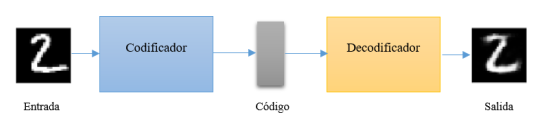

Se puede intuir que el propósito de un auto-codificador es aprender una aproximación de la función identidad. 
Esto parece ser algo trivial, pero en realidad en función de los requisitos con los que se configure la red se puede descubrir en el código una estructura interesante que nos proporcione información importante acerca de 
los datos de entrada.  
El objetivo principal de un auto-codificador es la reducción de la dimensionalidad. Sin embargo, el hecho de 
que el código retenga datos relevantes sobre la entrada hace que sea de gran utilidad para otras aplicaciones 
como por ejemplo la reducción de ruido en imágenes o la clasificación a partir de dicha estructura obtenida. A 
esto se une la ventaja de que sea un método no supervisado, es decir, no requiere que se le especifiquen 
etiquetas para ser entrenado, sólo se le pasan los datos de entrada.  
La red de un autoencoder consta de dos partes: 
* Codificador (encoder): Comprime los datos de entrada, con el objetivo de obtener las características 
principales de dichos datos. La salida del codificador es la denominada capa oculta del autoencoder o 
código ($h$).  Para la entrada $x$, con una matriz de pesos $W$ y un sesgo $b$:  
$$ℎ = 𝑓(𝑥) = 𝑓(𝑊𝑥 + 𝑏)$$
* Decodificador (decoder): Reconstruye la entrada a partir de las características recogidas en el 
codificador. En este caso la entrada del decodificador será h (salida del codificador), con una matriz 
de pesos $W$’ y un sesgo $b$’. 
$$𝑟 = 𝑔((𝑓(𝑥)) = 𝑔(𝑊′ℎ + 𝑏′) $$

Los autoencoders se entrenan con las mismas técnicas que una red neuronal tradicional, mediante back-propagation (método del descenso de gradiente). 

De forma general, existen tres hiperparámetros a tener en cuenta a la hora de diseñar un autoencoder: 

* Número de capas: hasta ahora se ha presentado el autoencoder como una red de tres capas. Sin 
embargo, la capa oculta puede ser tan profunda como se quiera.  
* Número de neuronas por capa: Esto se verá en las diferentes pruebas que se realicen a nivel práctico. 
En función de este número la red se comportará de una manera u otra. Habitualmente, el número de 
neuronas va disminuyendo o se mantiene igual conforme se avanza en las capas del codificador, y 
luego se reestablecen en el mismo orden para el decodificador. Para el caso de las neuronas en el código (capa oculta central), cuanto menor tamaño mayor compresión. 
* Función de pérdidas: Esto se verá en el siguiente sub-apartado para cada tipo de arquitectura. Algunas 
de las más usadas son el error cuadrático medio (MSE) o la entropía cruzada binaria. 

## Tipos de arquitectura
La dimensión de la capa oculta va a diferenciar dos grandes grupos en la clasificación de estas redes: uno en el 
que la dimensión de $h$ es inferior a la entrada y la salida (*undercomplete autoencoder*), y otro donde el código 
$h$ es superior a las otras dos capas (*regularized autoencoder*).

### Undercomplete autoencoder 
La dimensión de la capa oculta (código o $h$) es de menor dimensión que la entrada: $h < x$. Este es el caso más 
básico de autocodificador, en el que las neuronas del código son menores que la entrada y por tanto se produce 
una compresión que permite que genere una estructura con la información más relevante.  

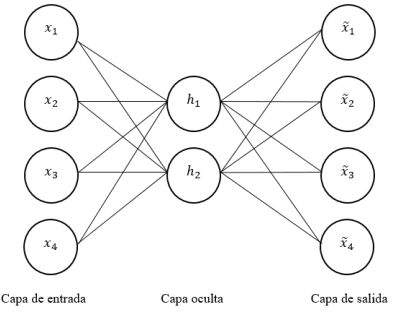

En el gráfico anterior, la salida será: $𝑟 = \tilde x_i$ siendo $\tilde x_i$ la neurona equivalente a la entrada $𝑥_𝑖$ tras ser 
decodificada. Esta estructura básica de tres capas puede extenderse a un autoencoder multicapa, en la que la 
capa oculta se extiende a un número mayor de capas para lograr una mejor generalización. Las neuronas de 
cada una de las capas ocultas, al igual que en el caso de las redes neuronales tradicionales, tendrán sus 
respectivos pesos ($𝑊_𝑖^{(𝑗)}$), los cuales serán aprendidos durante el entrenamiento de la red.  

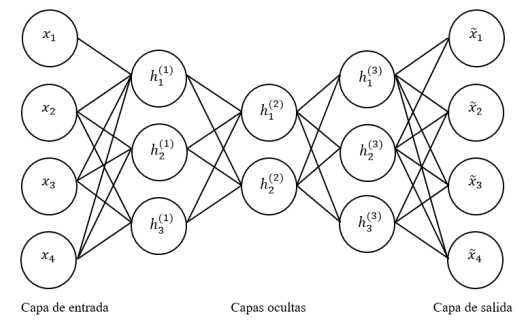

El objetivo de cualquier auto-codificador es minimizar una función de pérdidas: 
$$\min 𝐿 (𝑥, 𝑔(𝑓(𝑥))) $$
Para el caso del error cuadrático medio (MSE), en la que se mide la distancia entre la salida y la entrada:  
$$𝐿 = ||𝑥 − 𝑟||^2 $$
Cuando el decoder es lineal y $L$ es el error cuadrático medio, el autoencoder aprende el mismo subespacio que 
si se utilizara PCA. El auto-codificador entrenado aprendería el subespacio principal de los datos de 
entrenamiento.  
Si los datos son un vector de valores binarios o un vector de probabilidades entre 0 y 1, también se puede 
emplear la función de pérdidas de la entropía cruzada, en la que se calcula cuántos bits de información se 
conservan en la salida en comparación con la entrada: 

$$𝐿 = − \sum_{k=1}^d 𝑥_𝑘 \log 𝑟_𝑘 + (1 − 𝑥_𝑘) \log(1 − 𝑟_𝑘)$$


### Regularized autoencoder 

Cuando la capa oculta tiene una dimensión igual o superior a la capa de entrada (*overcomplete autoencoder*), 
la red puede aprender a copiar sin extraer información útil sobre la distribución de los datos, es decir, 
funcionaría como una matriz identidad. 

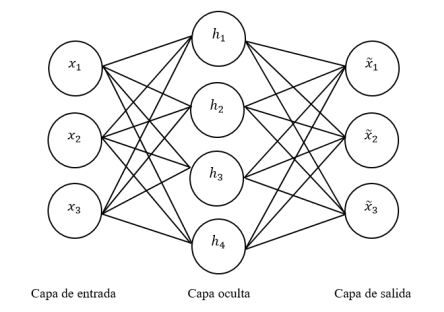

El objetivo de los auto-codificadores regularizados es precisamente el de entrenar cualquier arquitectura con 
éxito, eligiendo la dimensión del código y la capacidad (complejidad) del codificador y del decodificador para 
que se ajuste correctamente, independientemente de si el tamaño del código es igual o superior a la entrada. 
La regularización sirve de ayuda para controlar la complejidad del modelo, asegurando que es capaz de tomar 
mejores decisiones, es decir, conseguir que generalice lo mejor posible.  
Este tipo de autoencoders usan una función de pérdidas que permiten al modelo tener otras propiedades 
además de la capacidad de copiar la entrada en la salida, como la dispersión de la representación, la 
disminución de la derivada de la representación  y la robustez frente a ruido o entradas faltantes.  
Existen dos tipos de auto-codificadores regularizados, los cuales se analizan a continuación.

#### Sparse autoencoder (SAE) 
El funcionamiento de un autoencoder disperso (*sparse*) se basa en aplicar una restricción de dispersión.  
La restricción a aplicar puede variar en función de dónde se aplique. Por un lado se tiene la técnica 
denominada como “dropout”, en la que solo un número determinado de neuronas se activarán y se aplicará de 
forma aleatoria sobre las neuronas de la red. 
Una neurona está “activa” si su valor de salida está cercano a 1, y por el contrario, estará “inactiva” si su salida 
es cercana a 0. Esto hace que se puedan emplear más neuronas en la capa oculta, pero no todas se utilizarán 
para el aprendizaje. Se evita así que la capa oculta funcione solo como una matriz identidad, que solo sirva 
para copiar la entrada. 

Por otro lado, se puede aplicar la restricción sobre la función de pérdidas. A diferencia de otras 
regularizaciones, aquí la regularización depende directamente de los datos. El criterio de entrenamiento 
(función de pérdidas) de un auto-codificador disperso introduce una penalización o restricción de dispersión 
sobre la capa oculta ($h$), siendo $h$ la salida del codificador: $ℎ = 𝑓(𝑥)$. Esto significa que la limitación añadida 
va a cambiar dependiendo de los valores de entrada. 
$$𝐿 (𝑥, 𝑔(𝑓(𝑥))) + Ω(ℎ) $$
La restricción más utilizada es la basada en el concepto de divergencia de *Kullback-Leibler* (KL), que es una 
función estándar para medir cómo son dos distribuciones. En este caso, se mide la desviación entre una variable aleatoria de Bernoulli con media $𝜌$ (parámetro de dispersión) y una variable aleatoria de Bernoulli con 
media $\tilde \rho_j$ (activación media de la neurona en $h$). Será este parámetro $\tilde \rho_j$ el que dependa del valor de entrada.

$$Ω = 𝛽 \sum_{j=1}^{s_h} 𝐾𝐿(𝜌||\tilde \rho_j)= \beta \sum_{j=1}^{s_h} \rho \log\frac{\rho}{\tilde \rho_j} + (1 − 𝜌) \log\frac{1-\rho}{1-\tilde \rho_j}$$

El término $𝑠_ℎ$ es el número de neuronas en la capa oculta. Se añade también el parámetro $𝛽$, que se encarga de 
controlar el peso que va a tener el parámetro de penalización dentro de la función de pérdidas.  
Sin embargo, existen otras restricciones más sencillas, que serán las empleadas posteriormente en las pruebas 
realizadas. Dichas restricciones se denominan de nivel 1 (“L1”) o nivel 2 (“L2”) y se aplican directamente 
sobre los pesos de la red neuronal. La variable $𝜆$ es un hiperparámetro que controla la “cantidad” de 
regularización que se está aplicando sobre la red. 
Para el caso de “$L1$”, la regularización se calcula como la suma de los valores absolutos de los pesos: 

$$Ω = 𝜆𝑅(𝑊) = 𝜆 (\sum_i \sum_j |𝑊_{𝑖,𝑗}|)$$

Para el caso de “L2”, se calcula como la suma de pesos al cuadrado: 

$$Ω = 𝜆𝑅(𝑊) = 𝜆 (\sum_i \sum_j 𝑊^2_{𝑖,𝑗})$$

Además, este tipo de restricciones pueden aplicarse directamente sobre la salida de una capa concreta, es decir, 
la regularización se aplica sobre la función de activación de la capa en cuestión. Esto se denomina 
“regularización de actividad”.   

#### Denoising autoencoder (DAE) 
En lugar de añadir una penalización $Ω$ a la función de coste, se puede obtener un autoencoder que aprenda 
características útiles cambiando el término de la reconstrucción del error en la función de coste.  
DAE reconstruye la entrada $x$ a partir de una versión con ruido. Por tanto, la función a minimizar sería la 
mostrada a continuación, siendo $\tilde x$ una copia de $x$ que ha sido alterada por algún ruido. 
$$𝐿 (𝑥, 𝑔(𝑓(\tilde x)))$$
Por tanto, un DAE debe deshacer esta corrupción de los datos en lugar de simplemente copiar la información. 
Se fuerza a las funciones $f$ y $g$ a aprender implícitamente la estructura de los datos. El procedimiento de 
entrenamiento se puede observar en la siguiente figura. 

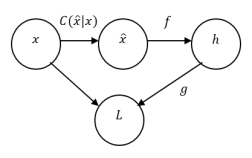

Se introduce el ruido mediante el proceso $𝐶(\tilde x|𝑥)$, que representa una distribución condicional sobre las muestras con ruido $\tilde x$. 
El autoencoder es entrenado para reconstruir un punto $x$ a partir de una versión $\tilde x$ con ruido.  
Esto se logra minimizando la función de pérdidas: 
$$𝐿 = − \log 𝑝_{𝑑𝑒𝑐𝑜𝑑𝑒𝑟}(𝑥|ℎ = 𝑓(\tilde x))$$
Típicamente, $𝑝_{𝑑𝑒𝑐𝑜𝑑𝑒𝑟}$ es definido por una función decodificador $𝑔(ℎ)$.

Este tipo de auto-codificadores pretenden solucionar el problema de que cuando las capas ocultas son de 
mayor dimensión que la entrada se copie directamente la información sin obtener datos relevantes. 
No obstante, un DAE permite eliminar el ruido que proviene de las muestras de entrada. Es por ello, que 
aunque aquí se haya detallado el proceso de incluirle ruido “artificialmente”, esto es aplicable directamente a 
una capa de entrada con ruido ya implícito.



### Otras arquitecturas 
Además de las arquitecturas más comunes que se han expuesto, existen otros tipos de auto-codificadores, los 
cuales se resumen a continuación. 


#### Contractive autoencoder (CAE) 
Al igual que en el caso de DAE, el objetivo de los auto-codificadores contractivos es hacer que la 
representación aprendida sea robusta frente a pequeños cambios en la entrada.  
Para ello, se agrega un nuevo término de penalización a la función de pérdidas, correspondiente a la norma de 
Frobenius de la matriz jacobiana3, la cual contiene una derivada parcial del valor de activación de una neurona 
con respecto al valor de entrada. Con esto, cuando se aumenta el valor de activación, aumentará el jacobiano, 
penalizando la representación.  

$$𝐿_{𝐶𝐴𝐸 }= \sum (𝐿 (𝑥, 𝑔(𝑓(𝑥))) + 𝜆 ‖𝐽_ℎ(𝑥)‖^2_𝐹) $$

#### Variational autoencoder (VAE) 
A diferencia de los usos típicos de una red neuronal como puede ser la clasificación o la regresión, los auto-
codificadores variacionales son potentes modelos generativos, que actualmente está muy de moda en 
aplicaciones como por ejemplo generar rostros humanos falsos o producir música sintética. 

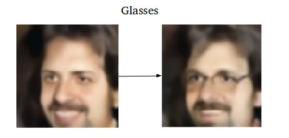

Con un modelo generativo lo que se quiere es generar una salida aleatoria nueva, en función de los datos de 
entrenamiento. También se puede especificar una dirección para la salida, de forma que sea como se desee y 
no tan aleatoria.  
El problema de usar los auto-codificadores normales para este tipo de aplicaciones es que el espacio codificado 
(la capa oculta) puede no ser continua o que permita una fácil interpolación.  
En los VAE se busca que el espacio codificado permita un muestreo fácil e interpolación. Para ello, se 
construye una distribución probabilística para estimar la distribución de las características. Se generan dos 
vectores: un vector de medias () y otro vector de desviaciones típicas (). 

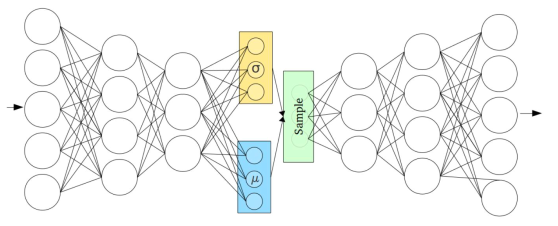

####  Auto-codificadores apilados 
A pesar de no ser una nueva estructura como tal, es necesario mencionar en este apartado el caso del apilado 
de auto-codificadores. Con un solo autoencoder podemos encontrar las características fundamentales (simples) 
de los datos de entradas. Pero si queremos que la red neuronal detecte conceptos más complejos (por ejemplo 
un rostro en una imagen), podría ser necesaria una red más compleja.  
Es por ello que aparece el término de autoencoders apilados, que no es otra cosa que usar varios auto-
codificadores, y entrenarlos uno a uno, de forma que la salida de un autoencoder sirva para entrenar el 
siguiente.  

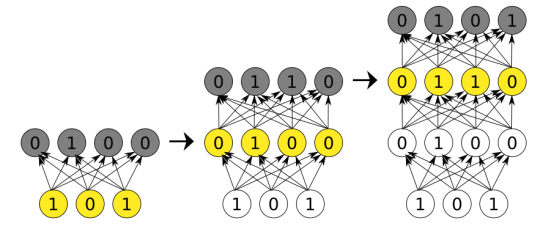

##  Auto-codificadores convolucionales 
Todos los conceptos y arquitecturas detalladas anteriormente para un auto-codificador pueden ser extrapolados 
a una red neuronal convolucional. El diseño de un auto-codificador convolucional es superior a los 
autoencoders apilados, incorporando relaciones espaciales entre los píxeles de las imágenes.  

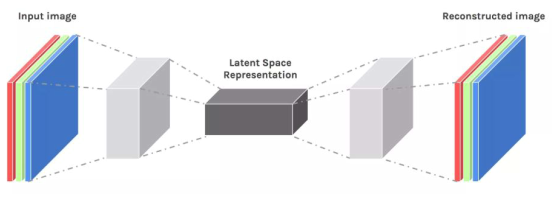

Este tipo de autoencoders serán los empleados principalmente para el procesado de imágenes.  
Su estructura es la misma que la de una red neuronal convolucional, pero teniendo en cuenta que la red tendrá 
dos partes y debe ser simétrica: codificador y decodificador. El hecho de que la red sea simétrica significa que 
en la parte del decodificador, las capas internas deben de comportarse de forma inversa a como lo hacen en el 
codificador.  
Con ellas se va comprimiendo la entrada hasta llegar a la capa central o código.  
Como se ha indicado, a la hora de decodificar es necesario realizar el proceso inverso al realizado en el 
codificador. Para ello, lo lógico sería pensar que se debe realizar una especie de “deconvolución”. En realidad 
lo que se quiere es poder realizar una convolución en la que se pase de una imagen de baja a alta resolución. 
Existen dos métodos para realizarlo, que suelen en ocasiones confundirse como el mismo. 
El primero de los métodos consiste en emplear una capa de *Upsampling* y tras ella una capa de convolución 
clásica (esta será igual que la de convolución del codificador). En la siguiente figura puede verse un ejemplo 
del proceso de Upsampling, con el que se sobremuestrea la imagen repitiendo los píxeles.  

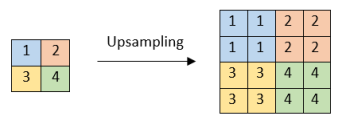

El segundo método consiste en realizar lo denominado como convolución traspuesta (*Transpose Convolution*), 
que consiste en vez de sobremuestrear la imagen, se realiza un relleno con ceros de la matriz y se colocan los 
píxeles en la primera celda de cada sub-matriz (*unpooling*). Tras ello, igualmente se aplica una capa de 
convolución clásica. Este método es implementado directamente en algunas librerías y puede emplearse como 
una única capa. En la siguiente figura puede verse este *unpooling* en el mismo ejemplo. 

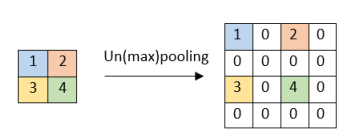

La convolución traspuesta es una aproximación del gradiente de la convolución, mientras que el primer caso 
podría considerarse como una suma de la convolución. Al final ambos métodos tienen el mismo objetivo, 
aunque con procedimientos diferentes. En el caso del *Upsampling* combinado con convolución se obtienen 
unos resultados algo más suaves que con el método de la convolución traspuesta. 
En la imagen que se muestra a continuación se recoge un ejemplo de auto-codificador convolucional y su 
conjunto de capas. Se ha omitido en este grafo las capas correspondientes a las funciones de activación (que 
van a ir siempre de la mano de las capas convolucionales). El código (h) se ha representado como una capa 
adicional pero realmente es la salida del último pooling del codificador. La salida del autoencoder se trata de 
una última capa de convolución, que como se verá durante la implementación tendrá una función de activación 
diferente a las utilizadas a las anteriores, y viene a sustituir a la capa completamente conectada de las redes 
convolucionales tradicionales.  

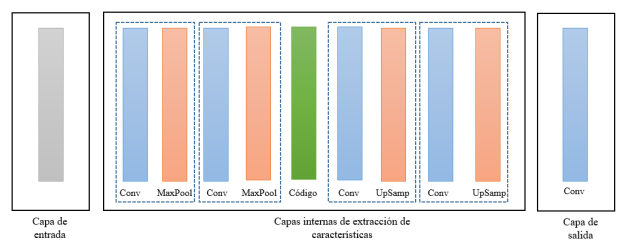

## Comparativa con PCA 
Una de las principales propiedades de los auto-codificadores es la reducción de la dimensionalidad del espacio 
de características. Como se ha expuesto anteriormente, su objetivo es conseguir un código de dimensión 
menor con el que se obtengan las características fundamentales de los datos de entrada. Esto es necesario 
cuando se tiene un número elevado de dimensiones en los datos de entrada, porque la aplicación de algoritmos 
sobre ellos se vuelve difícil y costosa.  
Existen diferentes métodos en Machine Learning para reducir la dimensionalidad, pero el más común es el 
conocido como Análisis de Componentes Principales (PCA). Su objetivo es disminuir el conjunto de datos 
(vector x) en otro de dimensionalidad menor (vector y) mediante una transformación ortogonal. La idea es 
poder encontrar un conjunto de ejes sobre los que los datos tienen mayor varianza, y usar dichos ejes para 
proyectar los valores.  
El vector $y$ será un conjunto de variables incorreladas, denominadas componentes principales. El primer 
componente constituye la mayor varianza de los datos y es igual al mayor autovalor de la matriz de covarianza. Los componentes siguientes del vector representan las siguientes varianzas, todas en orden 
decreciente con respecto a los autovalores de la matriz de covarianza. Para el cálculo de autovalores y 
autovectores puede emplearse el método matemático de Descomposición en Valores Singulares (SVD).  

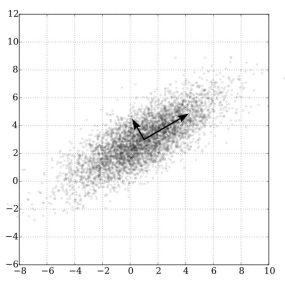

  Ejemplo de PCA sobre una distribución Gaussiana multivariable 

Un auto-codificador como ya se ha visto tiene una capa de entrada, una capa oculta y otra de salida. La 
reducción de la dimensionalidad se produce precisamente en la capa oculta, en el que se reduce el tamaño de 
los datos de entradas. Cuando el AE se activa mediante funciones lineales su resultado se aproxima (casi 
equivalente) al que se puede dar usando PCA. 
Sin embargo, las redes neuronales permiten introducir funciones de activación no lineales, lo que convierte 
esto en una ventaja del auto-codificador con respecto a PCA. La no linealidad permite explorar modelos más 
complejos y obtener buenos resultados.  
Además, cuanto mayor es el número de características más lento será el procesado con PCA, ya que 
incrementa el cálculo a realizar. Por ejemplo, para una imagen de 256x256, la dimensión será de 65536. La 
matriz de covarianza será por tanto de 65536x65536, por lo que será excesivamente costoso encontrar SVD. 
En esto también mejora un auto-codificador, ya que las transformaciones son sencillas para conseguir el valor 
de los pesos. Esta es una de las principales características de las redes neuronales con respecto a otros 
algoritmos de *Machine Learning*.  
Por otro lado, la función objetivo de PCA suele tener una solución óptima global, mientras que en los AE su 
función objetivo puede dar lugar a muchos óptimos locales. Esto realmente puede convertirse en un  problema  
en el caso de los  autoencoders, ya que el resultado obtenido tras el entrenamiento puede no ser el esperado, y 
que el algoritmo se haya quedado en un óptimo local.  

## Autoencoders para detección de anomalías

Si se tienen datos correlacionados, el método de autoencoder trabajará bien dado que este método se basa en elementos correlacionados para comprimir los datos.

Digamos que entrenaremos un autoencoder en el dataset de MNIST. Usando una red neuronal simple FeedForward, podemos alcanzar esto usando una red simple de 6 capas como se muestra a continuación:


In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)

Como podemos ver en la salida, el valor de pérdida del conjunto validación 0.188 el cual es bueno. Ahora si pasamos una imagen del dataset MNIS, la pérdida de reconstrucción será muy baja ($<0.02$), pero si metemos otra imagen diferente (outlier o anomalía), obtendremos una vloar alto  de pérdida por que la red falló en reconstruir la image que es considerada como una anomalía.

Notemos que en código arriba, podemos usar la parte donde se codifica para comprimir dato e imágenes y también se puede utilizar la parte de decodificación para descomprimir los datos cargando las capas de decodificación.

Ahora, hagamos una detección de anomalías. El código de abajo utiliza dos imágenes diferente para predecir el puntaje de una anomalía (valor de pérdida) usando el autoencoder de la red entrenada recientemente. La primer imagen proviene de MNIST y el resultado es 5.43209. Esto significa que la imagen no es una anomalía. La segunda imagen es una imagen aleaotria que no pertenece al conjunto de entrenamiento y el resultado fue 6789.4907. Este error alto significa que la imagen es una anomalía. El mismo concepto aplica para otros casos.

In [ ]:

%matplotlib inline
!rm -rf "/content/DeepLearn"
! git clone https://github.com/pikey-msc/DeepLearn
from keras.preprocessing import image
# if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.
img = image.load_img("/content/DeepLearn/img.png", target_size=(28, 28), color_mode = "grayscale")
input_img = image.img_to_array(img)
inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

## Ejemplo de Denoising 

Básicamente es quitar el ruido de una imagen. Usaremos el MNIST para crear un dataset con ruido, el siguiente código agregará un poco de ruido a los datos.

In [ ]:
import matplotlib.pyplot as plt
# The code below is from the Keras Blogs
# https://blog.keras.io/building-autoencoders-in-keras.html

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

Crearemos una red neuronal convolucional con Autoencoder.
Usaremos dos capa de convolución con kernel de $3\times3$.
Utilizaremos Maxpooling después de cada capa de convolución.  

In [ ]:

from keras import layers
from keras import models

input_img = Input(shape=(28, 28, 1))

nn = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = keras.layers.MaxPooling2D((2, 2), padding='same')(nn)
nn = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(nn)

In [ ]:
nn =  keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn =  keras.layers.UpSampling2D((2, 2))(nn)
nn =  keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn =  keras.layers.UpSampling2D((2, 2))(nn)
decoded =  keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test_noisy, x_test))

In [ ]:

#Print one image to see the noise
plt.imshow(autoencoder.predict(x_test_noisy[1]).reshape(28, 28))